<a href="https://colab.research.google.com/github/Christinastalin/DataScience-/blob/main/Purchase_Data_Statistical_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Read dataset
df = pd.read_csv('/content/train (23).csv')

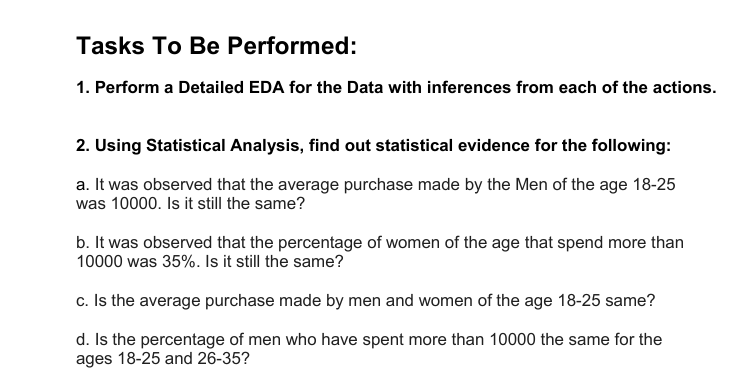

**⚙️ Why Do We Scale or Standardize Data?**



Machine learning models (especially distance-based ones like KNN, SVM, or gradient descent-based models like linear/logistic regression) perform better when features are on a similar scale.



**🔁 Scaling vs. Standardization: What’s the Difference?**


1️⃣ Scaling (Normalization / Min-Max Scaling)

Goal: Rescales features to a fixed range, usually [0, 1].


✅ Use when:

Your data doesn’t follow a normal distribution.

You want features bounded to a range (e.g., image pixels or neural networks).

📌 Example:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)



**2️⃣ Standardization (Z-score Normalization)**



Goal: Transform features to have:

Mean = 0

Standard deviation = 1


✅ Use when:

Data follows a normal or near-normal distribution.

Algorithms assume zero mean and unit variance (like linear models, PCA, etc.).


📌 Example:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized = scaler.fit_transform(data)



**🤔 Which One Should You Use?**


Use Case	  Choose This


Normal distribution	    Standardization


Bounded feature range	    Min-Max Scaling

Neural networks	         Scaling


PCA / Linear Regression	    Standardization




**📊 Visual Comparison**



Before scaling:



Feature1: [100, 200, 300]
Feature2: [1, 2, 3]



After MinMax scaling:



Feature1: [0.0, 0.5, 1.0]
Feature2: [0.0, 0.5, 1.0]




After Standardization:



Feature1: [-1.22, 0.0, 1.22]
Feature2: [-1.22, 0.0, 1.22]






**⚠️ Key Takeaways:**




Min-Max Scaling squashes all values into the range [0, 1].

Standardization transforms data so it’s centered around 0, with a unit standard deviation.

Both are helpful depending on the model and distribution.


In [3]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [10]:
df.shape

(263015, 12)

In [16]:
#Label Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['User_ID'] = le.fit_transform(df['User_ID'])
df['Product_ID'] = le.fit_transform(df['Product_ID'])
df['Age']=le.fit_transform(df['Age'])
df['Gender']= le.fit_transform(df['Gender'])
df['City_Category']= le.fit_transform(df['City_Category'])

In [17]:
df=df.dropna()

In [11]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '1', '4', '0', '3'], dtype=object)

In [18]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+','4')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80582 entries, 1 to 263011
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80582 non-null  int64  
 1   Product_ID                  80582 non-null  int64  
 2   Gender                      80582 non-null  int64  
 3   Age                         80582 non-null  int64  
 4   Occupation                  80582 non-null  float64
 5   City_Category               80582 non-null  int64  
 6   Stay_In_Current_City_Years  80582 non-null  int64  
 7   Marital_Status              80582 non-null  float64
 8   Product_Category_1          80582 non-null  float64
 9   Product_Category_2          80582 non-null  float64
 10  Product_Category_3          80582 non-null  float64
 11  Purchase                    80582 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 8.0 MB


In [19]:
#changing Stay_In_Current_City_Years dtype to int64
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')

In [8]:
df["Stay_In_Current_City_Years"].unique()

array([2, 1, 4, 0, 3])

In [16]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [38]:
df.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000
mean,2873.199809,1422.191693,0.776216,2.451540,8.173426,1.087513,1.860775,0.401752,2.738366,6.892085,12.658298,11628.183279
std,1664.796297,915.002638,0.416782,1.338429,6.487913,0.758965,1.285501,0.490255,2.563225,4.498417,4.129156,5069.515441
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1427.000000,701.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7868.000000
50%,2916.000000,1286.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,1.000000,6.000000,14.000000,11744.500000
75%,4215.000000,2044.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15610.000000
max,5891.000000,3506.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23958.000000


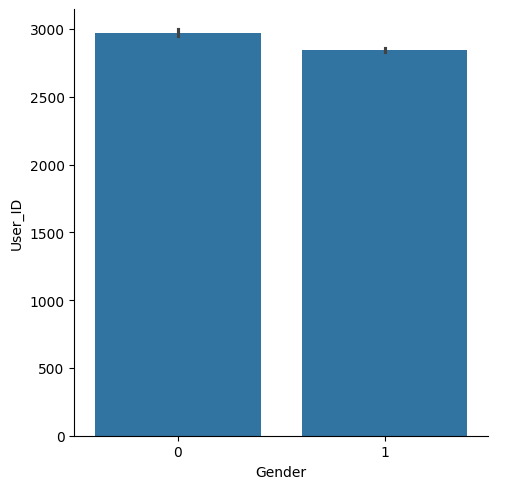

In [32]:
#Visualizing the data to understand distribution of various features
sns.catplot(data=df, x= 'Gender', y='User_ID', kind= 'bar')
plt.show()

Number of purchases made by female are higher than that made by Male.

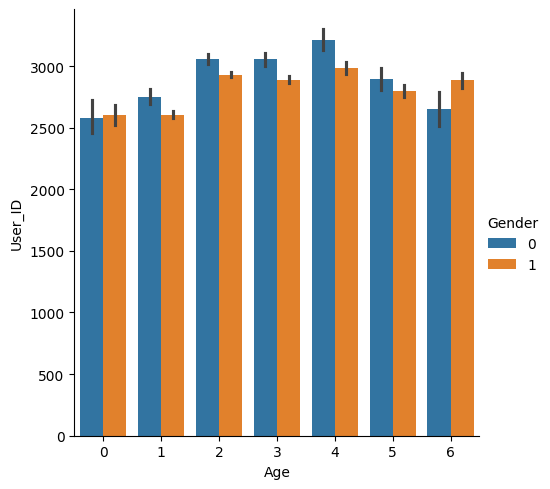

In [33]:
sns.catplot(data=df, x='Age', y='User_ID', hue='Gender', kind='bar')
plt.show()

Female in the 4th age category are the highest purchasers

In [ ]:
df['Gender'].groupby(df['Age']).value_counts()

###Inferences from the Plot:
1. The most frequent purchases came from the females having user ids that belong to age category 4(36-45)
2. The least frequent purchases came from the males of the age category 1(18-25), and females of age category 0(0-17).

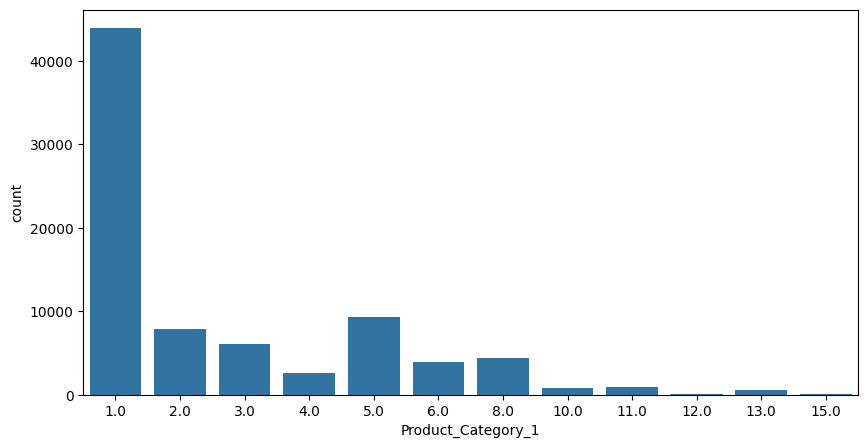

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x= 'Product_Category_1')
plt.show()

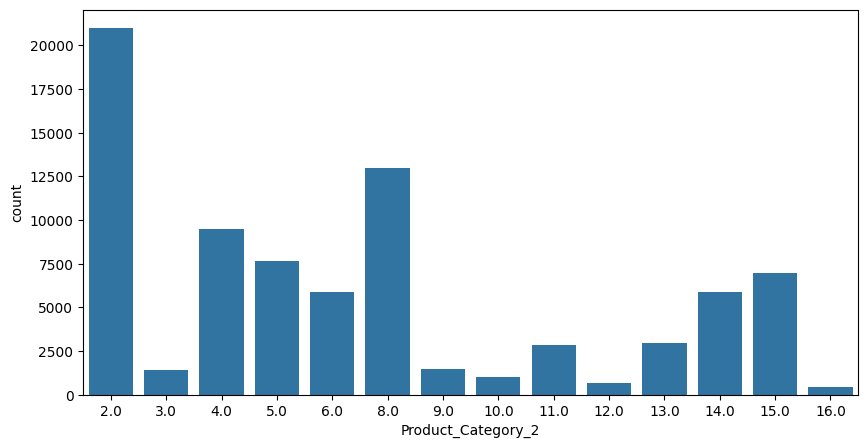

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x= 'Product_Category_2')
plt.show()

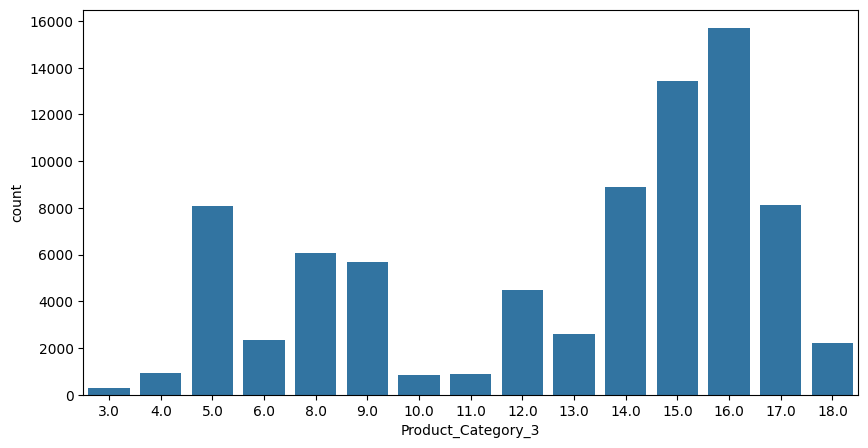

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x= 'Product_Category_3')
plt.show()

In [22]:
#checking the correlation of the features
corr_spearman = df.corr()
corr_pearson = df.corr(method='pearson')
corr_kendall = df.corr(method='kendall')

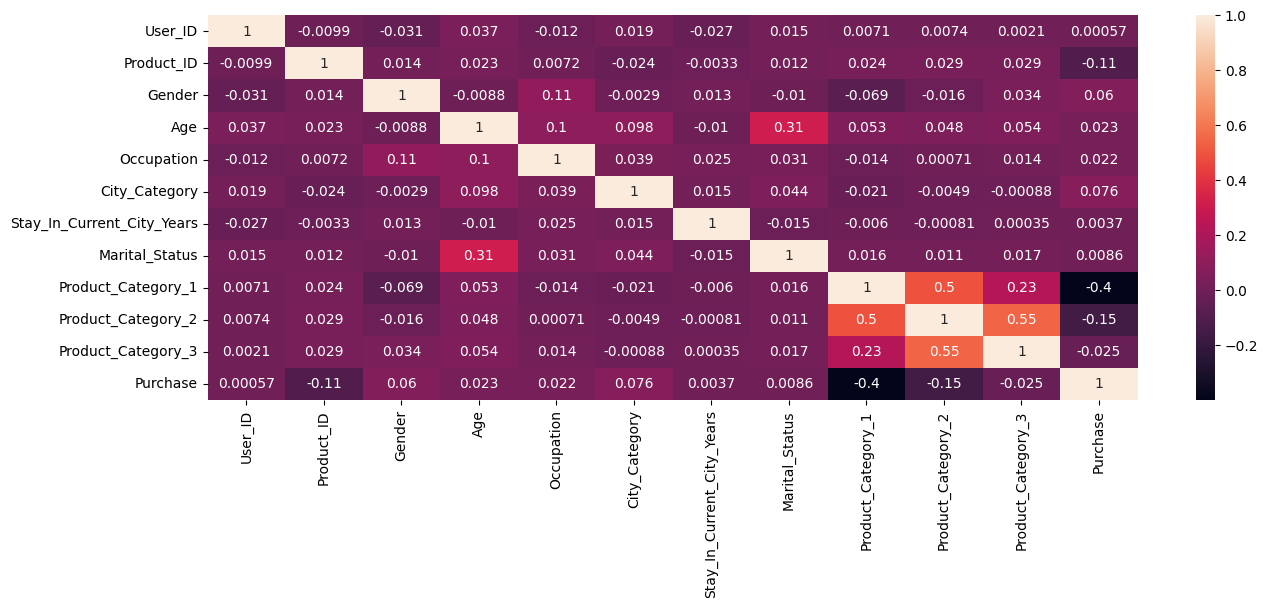

In [23]:
#spearman correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_spearman, annot=True)
plt.show()

<Axes: >

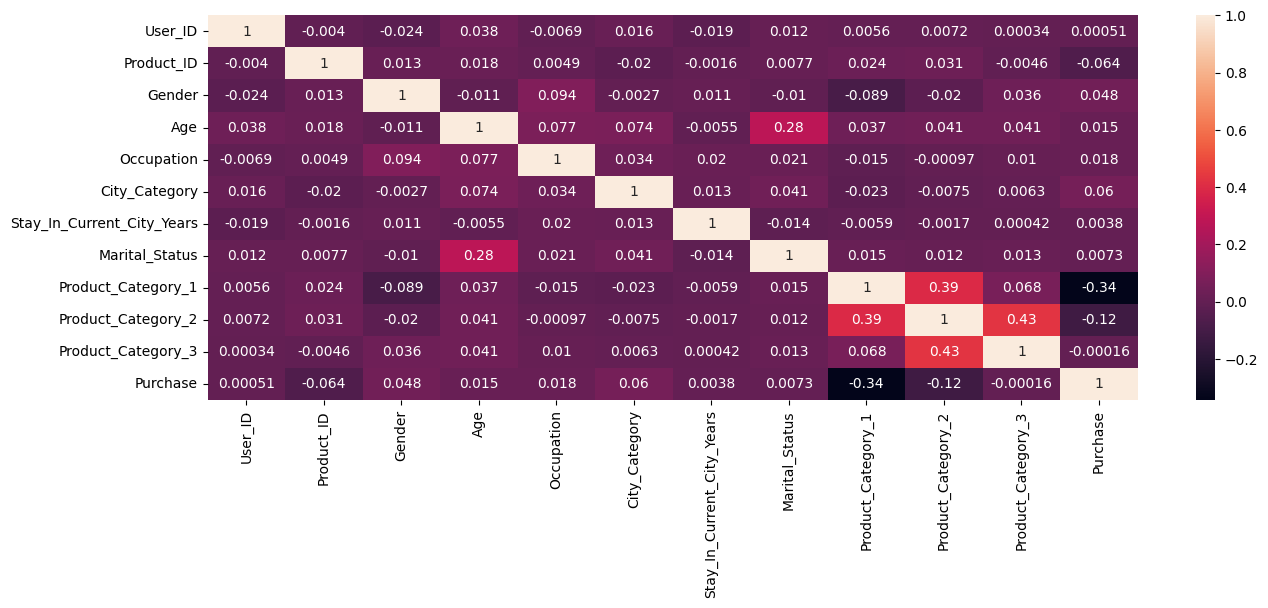

In [24]:
#kendall correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_kendall, annot=True)

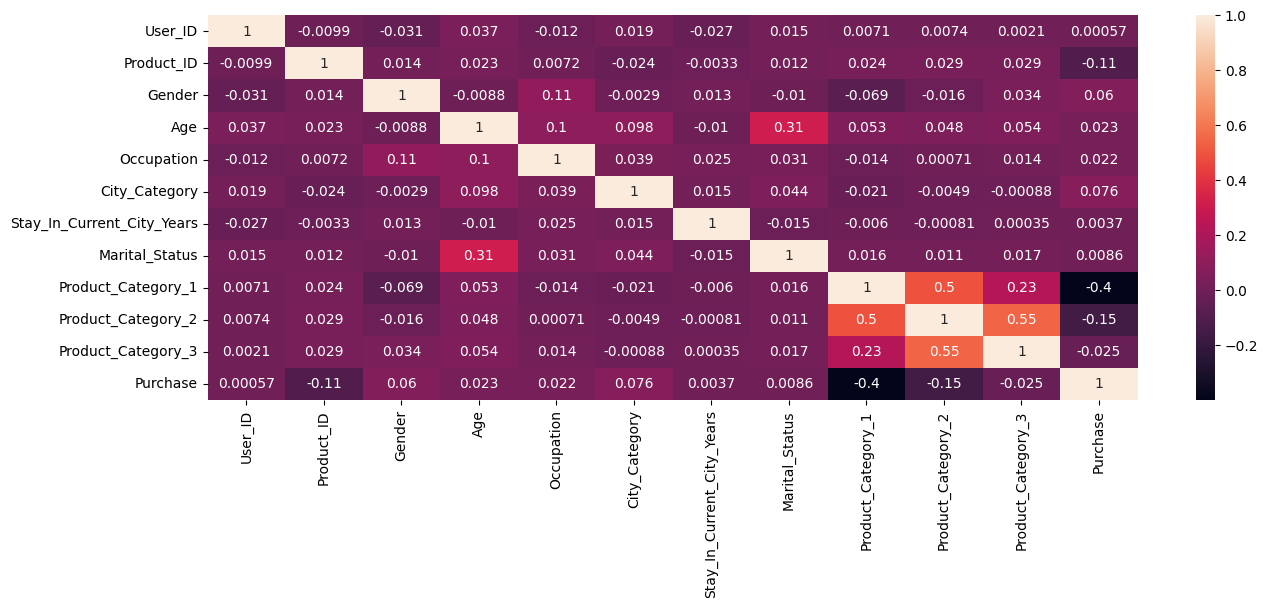

In [25]:
#pearson correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_pearson, annot=True)
plt.show()

###Statistical Analysis

**🌟 What is Hypothesis Testing?**



Hypothesis testing is a statistical method used to make decisions or inferences about population parameters based on sample data.
It helps answer questions like:

Is this marketing campaign effective?
Do students from group A perform better than group B?
Does a drug reduce blood pressure more than a placebo?



**📌 Key Terms:**


***Null Hypothesis (H₀):***

Default assumption — no effect, no difference.
Example: "There is no difference between the means of group A and B."

***Alternative Hypothesis (H₁ or Ha):***


What you want to prove.
Example: "There is a difference between the means of group A and B."

***P-value:***


Probability of observing the sample results if the null hypothesis is true.

***α (Significance Level):***


The threshold you set to reject H₀. Common value: 0.05.

***Test Statistic:***

Value calculated from sample data used to decide whether to reject H₀.



**✅ Steps in Hypothesis Testing:**


*State the hypotheses*

H₀: No effect / No difference
H₁: Some effect / Some difference

*Set significance level (α) — usually 0.05*

*Choose a test based on data and question*

*Compute the test statistic & p-value*

*Make a decision:*


If p ≤ α, reject H₀ → evidence supports H₁

If p > α, fail to reject H₀ → no evidence for H₁



**🔄 Types of Hypothesis Tests**


Test Type	        Use Case

Z-Test	              Comparing means (large sample, known variance)

T-Test	        Comparing means (small sample, unknown variance)

ANOVA	          Comparing means across more than 2 groups

Chi-Square Test  	Testing independence/categorical variables (e.g., gender vs preference)

Mann-Whitney U Test   	Non-parametric test for comparing two independent groups

Wilcoxon Signed-Rank	  Non-parametric test for paired samples


**🧪 Types of T-Tests (Most Commonly Used)**


Type	Use Case
One-sample T-test	         Mean of one group vs known population mean

Two-sample T-test (independent)	     Compare means of two different groups

Paired sample T-test	        Same group before and after a treatment



💡 Example:
Suppose we want to test if a new teaching method is better than the old one.

H₀: The mean scores of students taught by new method = old method

H₁: The mean scores are different

Use a two-sample t-test if data is normally distributed.



In [26]:
#Performing One sample T test
#Let's suppose the observed mean purchase made by the Men of the age 18-25 was 10000. Is it still the same?
#Null Hypothesis (H0) - the mean is same
#Alternate Hypothesis (H1)- The mean is different

new_data = df.loc[(df['Gender'] == 1) & (df['Age'] == 1)]

In [27]:
new_data.shape

(11904, 12)

In [29]:
sample_size= 1000
sample = new_data.sample(sample_size, random_state = 0)

In [30]:
new_data.mean()

,0
User_ID,2604.416499
Product_ID,1374.509073
Gender,1.000000
Age,1.000000
Occupation,7.042255
City_Category,1.063172
Stay_In_Current_City_Years,1.866683
Marital_Status,0.194892
Product_Category_1,2.484207
Product_Category_2,6.584677


In [31]:
purchase_mean = 11785

In [32]:
sample_mean = sample['Purchase'].mean()
print(sample_mean)

11750.447


In [33]:
from scipy.stats import ttest_1samp

In [34]:
t_stat, p_value = ttest_1samp(sample['Purchase'], popmean=purchase_mean)
print(t_stat, p_value)

-0.21540497598886765 0.8294955587149927


In [35]:
#If p_value is less than 0.05 then we have no proof to accept null hypothesis
#but since here p_value is greater than 0.05, null hypothesis is accepted or
# there is no sufficient evidence to reject the null hypothesis
#Hence the mean is same as before.